## Titanic Data Exploration ##

***

Over the past several weeks, you've learned the code about how to explore and manipulate a dataset. Now it's time to practice what you've learned on a real-world dataset. 

***

### Titanic Dataset

The titanic dataset holds information about the passengers on the titanic. This includes passenger name, characteristics, and if they survived the accident. The dataset has the following columns:

    * pclass = passenger class; 1 = first class, 2 = second class, 3 = third class
    * survived = passenger survival; 1 = survived, 0 = did not survive
    * name = passenger name
    * sex = sex of passenger
    * age = age of passenger
    * sibsp = # of siblings / spouses aboard the Titanic
    * parch = # of parents / children aboard the Titanic
    * ticket = ticket number
    * fare = fare paid by passenger
    * cabin = passenger cabin
    * embarked = port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton
    * boat = lifeboat assignment 
    * body = recovered body number
    * home dest = anticipated home destination 
    
If you need some additional motivation before starting, please visit: https://www.youtube.com/watch?v=3gK_2XdjOdY

### How to work through the dataset:

Follow the prompts below to explore, manipulate, and visualize aspects of the dataset. Working with data takes time, so take your time as you start with a messy dataset and turn it into something that shows meaningful visualizations. 

***


### Import Libraries and Dataset

* Review the entire notebook to determine what you will be expected to do - then, import the necessary libraries
* Import the titanic.xlsx dataset

In [88]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
df = pd.read_excel('titanic.xlsx')

In [90]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Determine the Characteristics of the Dataset

   * How many columns are in this dataset?
   * How many rows are in this dataset?
   * What types of data are in each column? Does this make sense with that you know about that column?
   * Which variables are numeric? Which variables are categorical? What other variables are left outside of these two groups?
   * Which variable could be considered a 'dependent' variable?

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [92]:
#ther are 1309 columns in the dataset
# there are 14 rows in this dataset
#there are integers, object and float in the columns
#numeric variables:pclass,survived,age,sibsp,parch,fare,body
#categorical variables: name,sex,ticket,cabin,embarked,boat,home.dest
#survived could be the dependent variable

### Identify the Missing Data in the Dataset

   * Is there any missing data?
   * Which columns have any missing data?
   * Which column has the most missing information? Which column has the least?

In [93]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [94]:
#there is a missing data
#columns with a missing data are:age,fare,cabin,boat, body and home.dest
# columns with the most missing information are:cabin, boat,body, home.dest
#columns with least missing information  are:fare,embarked


### Handling the Missing Data in the Dataset

   * Remove the columns with excessive missing data (any column missing greater than 500 rows)
   * Remove the rows in the dataset that has missing "age" data. 
   * Recheck is there is any data missing in the dataset. 

In [95]:
df.drop( columns = ['body', 'cabin', 'boat', 'home.dest'], inplace  = True)

In [96]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [97]:
df.loc[df['age'].isnull()]


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,S
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,S
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,C
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,S
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,C
...,...,...,...,...,...,...,...,...,...,...
1293,3,0,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,S
1297,3,0,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,S
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,C
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,C


In [98]:
df.dropna(subset = ['age'], inplace = True)

In [99]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [100]:
df.dropna(subset = ['fare','embarked'], inplace  = True)

In [101]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [102]:
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [103]:
# there is no any missing data

### Creating Columns and Replacing Labels

   * Create descriptive labels for the categorical columns: pclass, survived, and embarked. Instead of the coding that shows in the dataset, create labels to describe what each category represents (i.e. in the embarked column S = Southhampton)
   * Create a new column called "Titanic Passenger" and make all values 1
   * Create a new column called "Family Size" - this column should equal the total number of family members each passenger was traveling with.
   * Create a column called "Travel Alone" - this column should be 1 if the passenger was traveling alone, and 0 if the passenger was traveling with family. 
   * Create a column called "Has Caregiver" - this column should have a value of 1 if a passenger is less than 13-years old AND the passenger is traveling with at least one family member, otherwise the value should be 0. 
   * Create a column called "Crew" - this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise. 
   * Create a column called "Age Group" to group passengers by their age (create five categories: infant, child, teen, adult, senior). You can use bins to complete this (or any other method you like). You define the cutoff points for each group you create. 
   
After create new columns, replace the basic coding "0/1" with meaningful labels. 

In [104]:
df['pclass'].replace([1, 2, 3], ['first class', 'second class', 'third class'], inplace  = True)
df['survived'].replace([0, 1], ['N', 'Y'], inplace  = True)
df['embarked'].replace([ 'S' ], ['Southhampton'], inplace  = True)


In [105]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,first class,Y,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southhampton
1,first class,Y,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southhampton
2,first class,N,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southhampton
3,first class,N,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southhampton
4,first class,N,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southhampton


In [106]:
df['Titanic Passenger'] = 1

In [107]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger
0,first class,Y,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southhampton,1
1,first class,Y,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southhampton,1
2,first class,N,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southhampton,1
3,first class,N,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southhampton,1
4,first class,N,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southhampton,1


In [108]:
df['Family Size'] = df['parch'] + df['sibsp']

In [109]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size
0,first class,Y,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southhampton,1,0
1,first class,Y,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southhampton,1,3
2,first class,N,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southhampton,1,3
3,first class,N,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southhampton,1,3
4,first class,N,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southhampton,1,3


In [110]:
df['Travel Alone'] = np.where((df['Family Size'] == 0), 1,0)

In [111]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Travel Alone
0,first class,Y,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southhampton,1,0,1
1,first class,Y,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southhampton,1,3,0
2,first class,N,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southhampton,1,3,0
3,first class,N,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southhampton,1,3,0
4,first class,N,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southhampton,1,3,0


In [112]:
df['Has Caregiver'] = np.where(((df['age'] < 13) & (df['Family Size'] >= 1)), 1,0)

In [113]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Travel Alone,Has Caregiver
0,first class,Y,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southhampton,1,0,1,0
1,first class,Y,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southhampton,1,3,0,1
2,first class,N,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southhampton,1,3,0,1
3,first class,N,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southhampton,1,3,0,0
4,first class,N,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southhampton,1,3,0,0


In [114]:
df['Crew'] = np.where((df['fare'] == 0),1,0)

In [115]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew
0,first class,Y,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southhampton,1,0,1,0,0
1,first class,Y,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southhampton,1,3,0,1,0
2,first class,N,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southhampton,1,3,0,1,0
3,first class,N,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southhampton,1,3,0,0,0
4,first class,N,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southhampton,1,3,0,0,0


In [116]:
bins = [0,20,40,60,80,100]
bin_labels =['infant','child','teen','adult','senior']
df['Age Group'] = pd.cut(df['age'], bins, labels = bin_labels)

In [117]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew,Age Group
0,first class,Y,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southhampton,1,0,1,0,0,child
1,first class,Y,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southhampton,1,3,0,1,0,infant
2,first class,N,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southhampton,1,3,0,1,0,infant
3,first class,N,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southhampton,1,3,0,0,0,child
4,first class,N,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southhampton,1,3,0,0,0,child


In [118]:
df['Travel Alone'].replace([ 0, 1], ['N', 'Y'], inplace  = True)
df['Has Caregiver'].replace([0, 1], ['N', 'Y'], inplace  = True)
df['Crew'].replace([ 0, 1 ], ['N', 'Y'], inplace  = True)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,Titanic Passenger,Family Size,Travel Alone,Has Caregiver,Crew,Age Group
0,first class,Y,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,Southhampton,1,0,Y,N,N,child
1,first class,Y,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,Southhampton,1,3,N,Y,N,infant
2,first class,N,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,Southhampton,1,3,N,Y,N,infant
3,first class,N,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,Southhampton,1,3,N,N,N,child
4,first class,N,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,Southhampton,1,3,N,N,N,child


### Determine Frequencies of Groups

* How many passengers fall into each category? Determine how many passengers fall into each group for <b>each</b> categorical vairable (including the ones you just created). 

In [119]:
df['pclass'].value_counts()

third class     500
first class     282
second class    261
Name: pclass, dtype: int64

In [120]:
df['survived'].value_counts()

N    618
Y    425
Name: survived, dtype: int64

In [121]:
df['sex'].value_counts()

male      657
female    386
Name: sex, dtype: int64

In [122]:
df['ticket'].value_counts()

CA 2144          8
347077           7
S.O.C. 14879     7
3101295          7
PC 17608         7
                ..
C.A. 34644       1
SC/PARIS 2168    1
C.A. 17248       1
230434           1
315082           1
Name: ticket, Length: 738, dtype: int64

In [123]:
df['embarked'].value_counts()

Southhampton    781
C               212
Q                50
Name: embarked, dtype: int64

In [124]:
df['Travel Alone'].value_counts()

Y    587
N    456
Name: Travel Alone, dtype: int64

In [125]:
df['Has Caregiver'].value_counts()

N    952
Y     91
Name: Has Caregiver, dtype: int64

In [126]:
df['Crew'].value_counts()

N    1035
Y       8
Name: Crew, dtype: int64

In [127]:
df['Age Group'].value_counts()

child     570
infant    248
teen      194
adult      31
senior      0
Name: Age Group, dtype: int64

### Determine the Distribution of Numeric Data

* What are the summary statistics for <b>each</b> numeric variable in the dataset? Summary statistics include:
    * Mean
    * Median
    * Mode
    * Standard Deviation
    * Range

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   pclass             1043 non-null   object  
 1   survived           1043 non-null   object  
 2   name               1043 non-null   object  
 3   sex                1043 non-null   object  
 4   age                1043 non-null   float64 
 5   sibsp              1043 non-null   int64   
 6   parch              1043 non-null   int64   
 7   ticket             1043 non-null   object  
 8   fare               1043 non-null   float64 
 9   embarked           1043 non-null   object  
 10  Titanic Passenger  1043 non-null   int64   
 11  Family Size        1043 non-null   int64   
 12  Travel Alone       1043 non-null   object  
 13  Has Caregiver      1043 non-null   object  
 14  Crew               1043 non-null   object  
 15  Age Group          1043 non-null   category
dtypes: cat

In [129]:
df['age'].mean()

29.813199137104508

In [130]:
df['age'].mode()

0    24.0
dtype: float64

In [131]:
df['age'].median()

28.0

In [132]:
df['age'].std()

14.366260969481111

In [133]:
age_range = df['age'].max() - df['age'].min()
print(age_range)

79.8333


In [134]:
df['sibsp'].mean()

0.5043144774688398

In [135]:
df['sibsp'].median()

0.0

In [136]:
df['sibsp'].mode()

0    0
dtype: int64

In [137]:
df['sibsp'].std()

0.913079718750799

In [138]:
sibsp_range = df['sibsp'].max() - df['sibsp'].min()
print(sibsp_range)

8


In [139]:
df['parch'].mean()



0.4218600191754554

In [140]:
df['parch'].median()

0.0

In [141]:
df['parch'].mode()

0    0
dtype: int64

In [142]:
parch_range = df['parch'].max() - df['parch'].min()
print(parch_range)

6


In [143]:
df['fare'].mean()

36.60302387344211

In [144]:
df['fare'].median()

15.75

In [145]:
df['fare'].mode()

0    13.0
dtype: float64

In [146]:
df['fare'].std()

55.75364770130805

In [147]:
fare_range = df['fare'].max() - df['fare'].min()
print(fare_range)

512.3292


In [148]:
df['Family Size'].mean()

0.9261744966442953

In [149]:
df['Family Size'].median()

0.0

In [150]:
df['Family Size'].mode()

0    0
dtype: int64

In [151]:
df['Family Size'].std()

1.454134167405243

In [152]:
Family_range = df['Family Size'].max() - df['Family Size'].min()
print(Family_range)

10


### Relationships between Variables

* Determine the relationship between each variable and the variable "survived". This is our primary variable of interest -- did this passenger survive the accident? Did the characteristics of the passenger have any relationship with their survival?
    * <b>pclass</b>: how many survivors are in each passenger class? does a pattern emerge? which class has the most survivors? which has the least?
    * <b>sex</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>age</b>: how does the average age of the passenger differ based on survival group? 
    * <b>age group</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>family size</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>travel alone</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>crew</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>has caregiver</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>fare</b>: how does the average fare the passenger paid differ based on survival group? 
    * <b>embarked</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    
Based on what you learn working through this section, make (2) statements about what characteristics of passenger most influenced their survival.

In [158]:
pd.crosstab(df['survived'], df['pclass'])

pclass,first class,second class,third class
survived,,,
N,103,146,369
Y,179,115,131


In [ ]:
#survivors: from first class-179,from second class-115,from third class-131
# first class has he most survivors
# second class has the least survivors

In [160]:
pd.crosstab(df['survived'], df['sex'])

sex,female,male
survived,,
N,96,522
Y,290,135


In [ ]:
# 290 female survivors and 135 male survivors
# female has most survivors than male

In [172]:
df['age'].groupby(df['survived']).mean()

survived
N    30.496899
Y    28.819020
Name: age, dtype: float64

In [165]:
pd.crosstab(df['survived'], df['Age Group'])

Age Group,infant,child,teen,adult
survived,,,,
N,134,348,112,24
Y,114,222,82,7


In [ ]:
#survivors: infant-114, child-222, teen-82, adult-7
#child has the most survivors while adult has the least survivors

In [166]:
pd.crosstab(df['survived'], df['Family Size'])

Family Size,0,1,2,3,4,5,6,7,10
survived,,,,,,,,,
N,401,93,63,9,11,20,12,8,1
Y,186,113,81,30,6,5,4,0,0


In [ ]:
#186 most survivors from non family group
# for the larger  family group the least survivors 

In [178]:
pd.crosstab(df['survived'], df['Travel Alone' ])

Travel Alone,N,Y
survived,,
N,217,401
Y,239,186


In [ ]:
#186 survivors fron travel alone
#239 the most survivors from non trval alone

In [179]:
pd.crosstab(df['survived'], df['Crew'])

Crew,N,Y
survived,,
N,612,6
Y,423,2


In [180]:
#2  survivors from  crew
#423 survivors from non crew

In [181]:
pd.crosstab(df['survived'], df['Has Caregiver'])

Has Caregiver,N,Y
survived,,
N,579,39
Y,373,52


In [ ]:
#  the most survivors from those who has not care giver -373
#  the least survivors  from those who has care giver -52

In [183]:
df['fare'].groupby(df['survived']).mean()

survived
N    25.148752
Y    53.258883
Name: fare, dtype: float64

In [184]:
pd.crosstab(df['survived'], df['embarked'])

embarked,C,Q,Southhampton
survived,,,
N,80,37,501
Y,132,13,280


In [ ]:
# the most survivors from Southhampton-280
#least survivors from Q -13

In [ ]:
# sex , age and trave alone are some of the characteristic that  most influenced their survival  

### Visualize your Results

* Using the most interesting (from your POV) results from the above section, create (3) visualizations to illustrate the results. 
* Create a barplot to show the variation in average age across passenger class. On average, which passenger class has the oldest passengers?
* Create a violin plot to show the distribution of age across passenger class. 

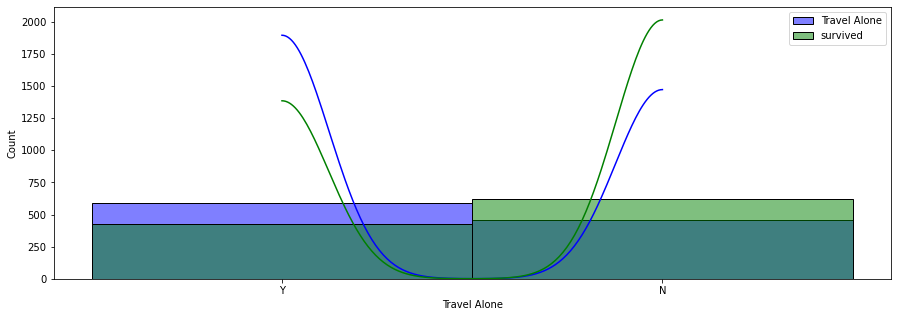

In [187]:
plt.figure(figsize=(15,5)) 

sns.histplot(df['Travel Alone'], color = "blue", label = "Travel Alone", kde=True) ## plot #1
sns.histplot(df['survived'], color ="green", label = "survived", kde=True) ## plot #2

plt.legend() 
plt.show() 

<AxesSubplot:xlabel='survived', ylabel='age'>

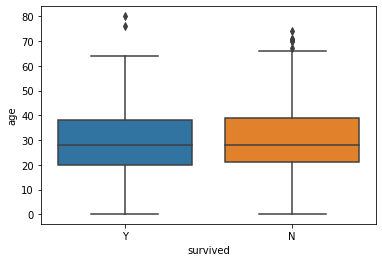

In [195]:
sns.boxplot(x = df["survived"], y = df["age"]) 

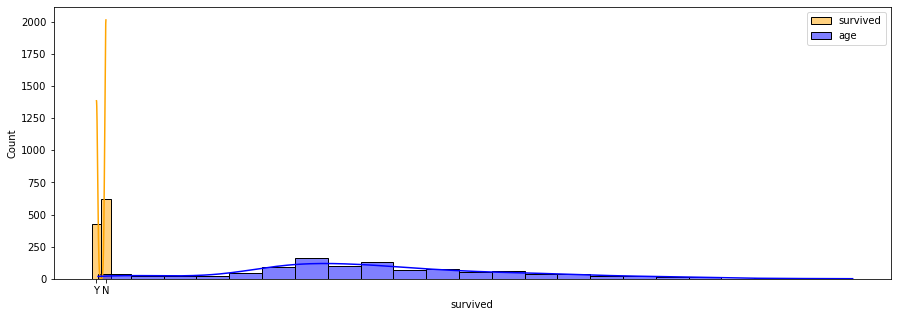

In [196]:
plt.figure(figsize=(15,5)) 

sns.histplot(df['survived'], color = "orange", label = "survived", kde=True) ## plot #1
sns.histplot(df['age'], color ="blue", label = "age", kde=True) ## plot #2

plt.legend()
plt.show() 

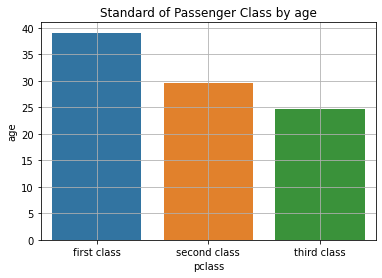

In [209]:
sns.barplot(data = df, x = "pclass", y = "age", ci = None)

plt.title('Standard of Passenger Class by age')
plt.grid()


In [210]:
#first class has the oldest passengers

<AxesSubplot:xlabel='pclass', ylabel='age'>

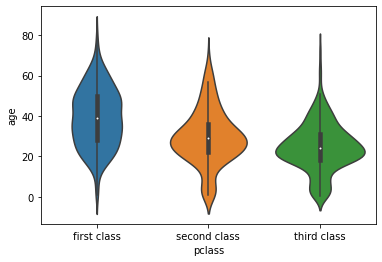

In [213]:


sns.violinplot(x = df["pclass"], y = df["age"])